#Importação

Nesse trecho vamos importar as bases

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/llucaslleall/quarentena-dados/master/Bases/movies.csv")
filmes

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
notas = pd.read_csv("https://raw.githubusercontent.com/llucaslleall/quarentena-dados/master/Bases/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [0]:
notas.columns = ["usuarioId","filmeId","nota","momento"]

In [0]:
filmes.columns = ["filmeId", "titulo", "generos"]

In [0]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Testando as funções

Apenas testando algumas funções do pandas

In [0]:
notas.query("filmeId == 1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [0]:
notas["nota"].mean()

3.501556983616962

In [0]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Tratando os dados

Gerando a média e buscando o filme

In [0]:
notas_medias = notas.groupby("filmeId")["nota"].mean()

In [0]:
filmes_medias = filmes.join(notas_medias, on="filmeId")

In [0]:
filmes_medias.sort_values("nota", ascending=False)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


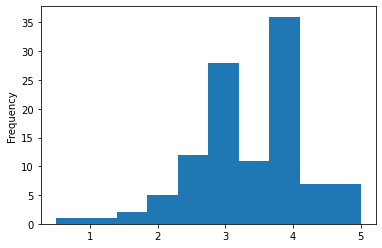

In [0]:
#Traçando o histograma dos dados
notas.query("filmeId == 2")["nota"].plot(kind="hist")

# Aula 2 - Tratando os dados

Tratando os dados recebidos

## Desafio 3 da aula 1

In [0]:
filmes["generos"]

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: generos, Length: 9742, dtype: object

In [0]:
generos = filmes["generos"].str.get_dummies('|').sum()

In [0]:
generos = generos.sort_values(ascending=False)
generos

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [0]:
generos.index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [0]:
generos.values

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34])

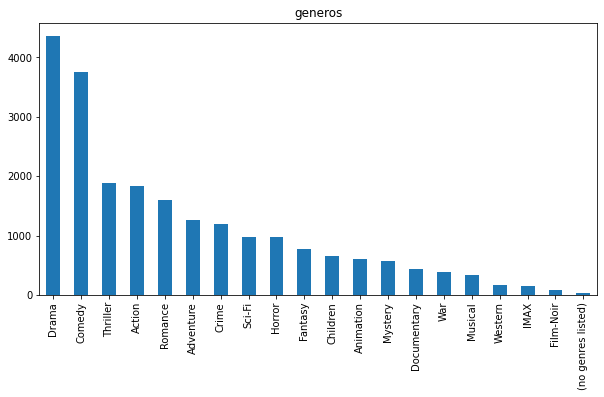

In [0]:
generos.plot(kind="bar", title="generos", figsize=(10,5))

### Usando o seaborn

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


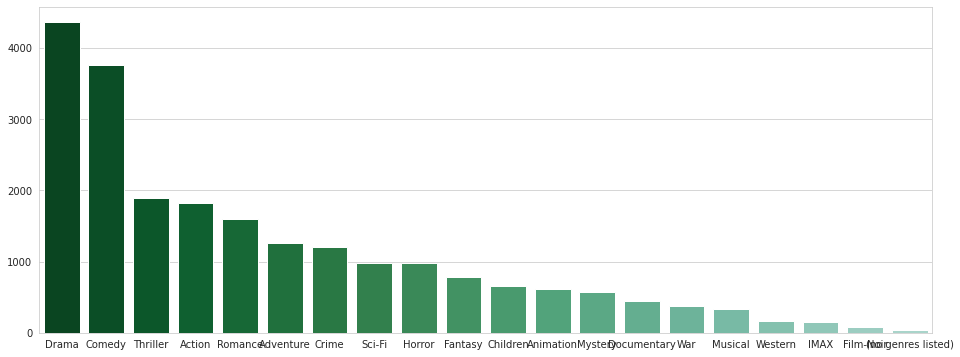

In [0]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
sns.barplot(x=generos.index, y=generos.values, palette = sns.color_palette("BuGn_r", n_colors=len(generos)+10))
plt.show()



## Voltando na média

Voltando na média para também considerar a mediana

In [0]:
filmes_medias

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [0]:
def plot_filme(n):
  notas_do_filme = notas.query(f"filmeId == {n}")["nota"]
  notas_do_filme.plot(kind="hist")
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

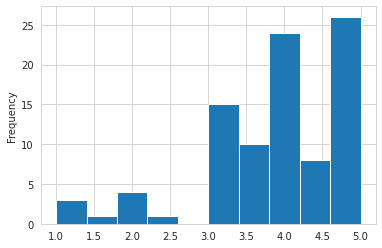

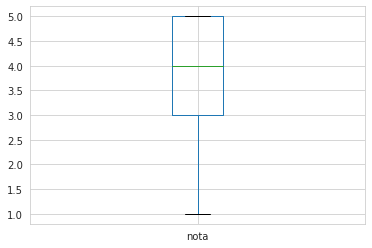

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(919)

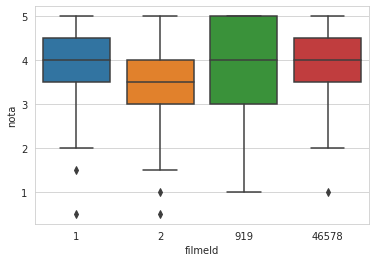

In [0]:
sns.boxplot(data = notas.query("filmeId in [1,2,919,46578]"),x="filmeId",y="nota")

#Desafios

## 1. Colocar o número de avaliações e encontrar os 18 filmes que não tem nenhuma nota da base inicial


In [0]:
#Verificando a base inicial
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
#Fazendo a contagem por id do filme
contagem = notas.groupby("filmeId")["nota"].count()
contagem

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [0]:
#Adicionando essa informação na base filmes
filmes = filmes.join(contagem, on="filmeId")
filmes

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0
9739,193585,Flint (2017),Drama,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1.0


In [0]:
#Renomeando as colunas
filmes.columns = ["filmeId","titulos","generos","conta_notas"]
filmes.head()

,filmeId,titulos,generos,conta_notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0


In [0]:
filmes.query("conta_notas.isnull()", engine='python')

,filmeId,titulos,generos,conta_notas
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


In [0]:
#Também colocando as notas para verificar se os filmes que tiveram maior nota foram os menos votados
filmes = filmes.join(notas_medias, on="filmeId")

In [0]:
#Renomeando as colunas
filmes.columns = ["filmeId","titulos","generos","conta_notas","nota_media"]
filmes.head()

,filmeId,titulos,generos,conta_notas,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


In [0]:
#Ordenando por nota_media
filmes.sort_values("nota_media", ascending=False).head(15)

,filmeId,titulos,generos,conta_notas,nota_media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
9094,143511,Human (2015),Documentary,1.0,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
4251,6201,Lady Jane (1986),Drama|Romance,1.0,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0
9122,145994,Formula of Love (1984),Comedy,1.0,5.0


In [0]:
#Ordenando por conta_notas
filmes.sort_values("conta_notas", ascending=False).head(15)

,filmeId,titulos,generos,conta_notas,nota_media
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
97,110,Braveheart (1995),Action|Drama|War,237.0,4.031646
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982
461,527,Schindler's List (1993),Drama|War,220.0,4.225000


## 2. Arredondar a nota para 2 casas decimais

In [0]:
#Recuperando a base de filmes
filmes.head()

,filmeId,titulos,generos,conta_notas,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


In [0]:
#Criando uma nova coluna com o arredondamento da note
filmes["nota_media_arred"] = filmes["nota_media"].round(2)
filmes.head()

,filmeId,titulos,generos,conta_notas,nota_media,nota_media_arred
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143,2.36
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429,3.07


## 3. Melorando a estética do plot

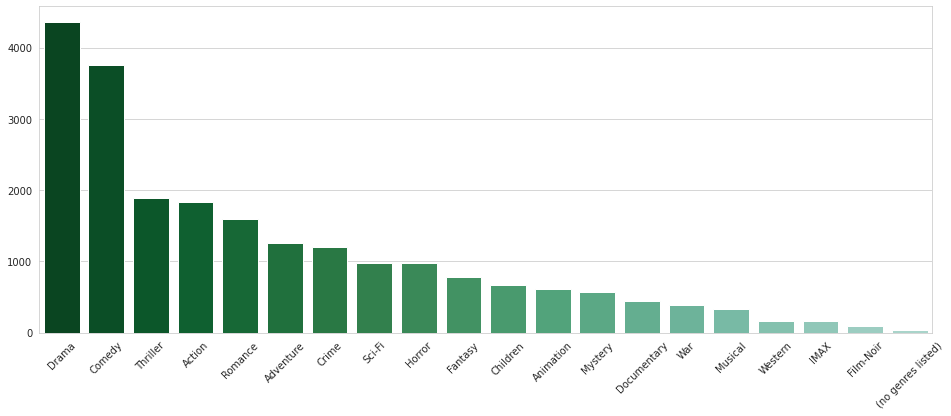

In [0]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
sns.barplot(x=generos.index, y=generos.values, palette = sns.color_palette("BuGn_r", n_colors=len(generos)+10))
plt.xticks(rotation=45) 
plt.show()

## 4. Fazer o boxplot dos 10 filmes com mais votos

In [0]:
#Voltando na tabela de filmes e pegando o top 10
filmes.sort_values("conta_notas",ascending=False).head(10)["filmeId"]

314      356
277      318
257      296
510      593
1939    2571
224      260
418      480
97       110
507      589
461      527
Name: filmeId, dtype: int64

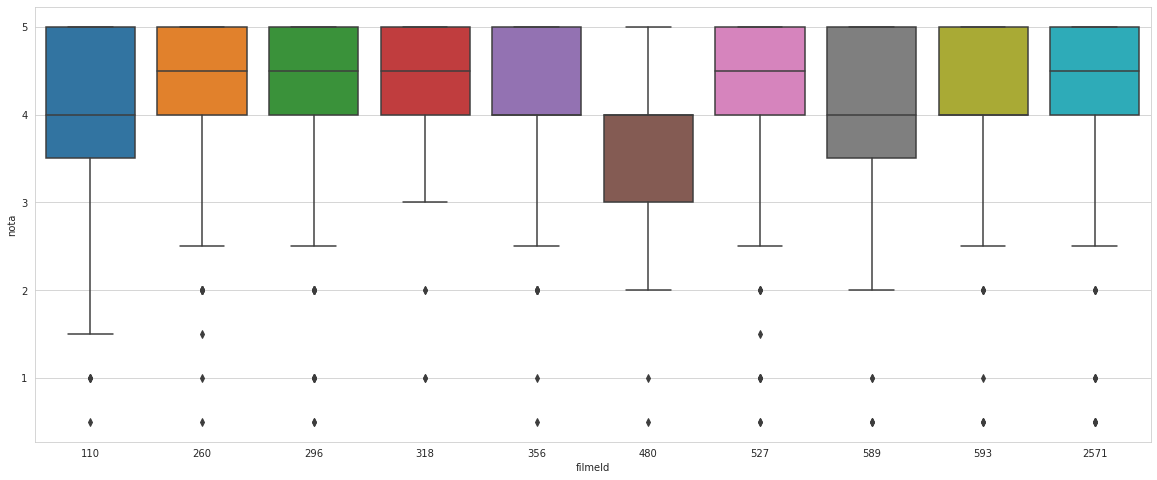

In [0]:
plt.figure(figsize=(20,8))
sns.boxplot(data = notas.query("filmeId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]"), x="filmeId", y="nota")

## 5. Colocar o nome no eixo x

In [0]:
#Trazendo a informaçao do nome
notas_nome = notas.join(filmes["titulos"], on="filmeId")

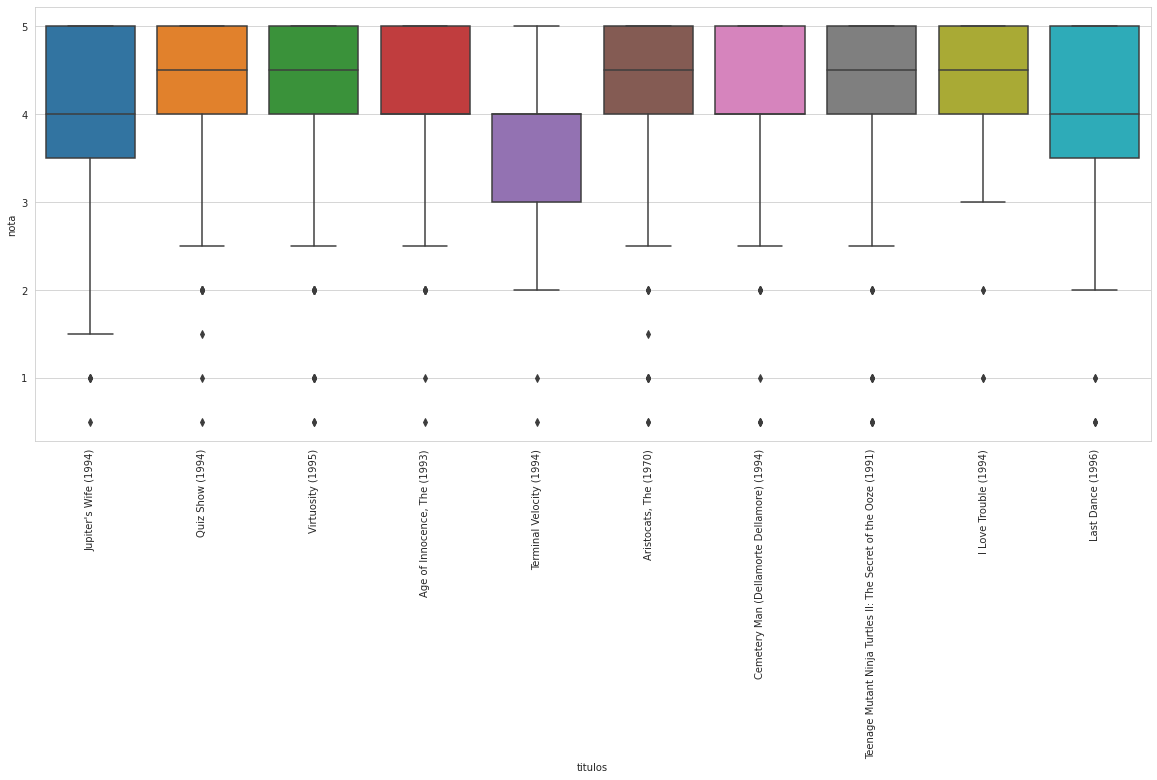

In [0]:
#Construindo o mesmo gráfico, mas agora com o nome
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.boxplot(data = notas_nome.query("filmeId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]"), x="titulos", y="nota")
plt.show()
